#1 data folder created
#2 csv files downloaded and renamed (gdp_percapita & internet_use).
#2 notebooks folder created / project name un_project

In [1]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#4	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
#4
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail(5))
print(gdp_df.info())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float6

#5 How many rows and columns are in `gdp_df`? What are the data types of each column?

7176 rows (if including header 0-7175), 4 columns, dtypes: float64(2), int64(1), object(1)

#6 Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [3]:
#6
print(gdp_df.drop('Value Footnotes', axis=1, inplace=True))

None


In [4]:
#6
gdp_df.rename({'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'GDP_Per_Capita'}, axis=1, inplace=True)
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


#7 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [25]:
#7
print(gdp_df.groupby(['Year'])[['Year']].count())
7#
print(gdp_df.groupby(['Country'])[['Country']].count() > 30)


      Year
Year      
1990   206
1991   207
1992   208
1993   209
1994   211
1995   222
1996   222
1997   226
1998   226
1999   227
2000   233
2001   234
2002   235
2003   235
2004   236
2005   236
2006   237
2007   237
2008   238
2009   239
2010   239
2011   240
2012   240
2013   242
2014   242
2015   242
2016   242
2017   242
2018   242
2019   241
2020   240
                             Country
Country                             
Afghanistan                    False
Africa Eastern and Southern     True
Africa Western and Central      True
Albania                         True
Algeria                         True
...                              ...
Vietnam                         True
West Bank and Gaza             False
World                           True
Zambia                          True
Zimbabwe                        True

[242 rows x 1 columns]


In [6]:
#7 ##Look at statement using operator for year & country both being true
print(gdp_df['Country'].nunique()) ##total unique countries in df

print((gdp_df.groupby(['Country'])[['Country']].count() == True).count()) ##incorrect
   

 

242
Country    242
dtype: int64


#8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [10]:
#8 prep
print(gdp_df['GDP_Per_Capita'].max())

161971.46466102


In [44]:
#8 prep
# created a data frame named gdp_2020 filtered to results for 2020 (240 observations) 
#(link for helpto filter: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)
gdp_2020 = gdp_df[gdp_df[['Year','GDP_Per_Capita']].isin([2020, ]).any(axis=1)]
print(gdp_2020)
print(gdp_2020['GDP_Per_Capita'].min())
print(gdp_2020['GDP_Per_Capita'].max())

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]
731.064073644609
112557.309471818


                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]
731.064073644609
112557.309471818


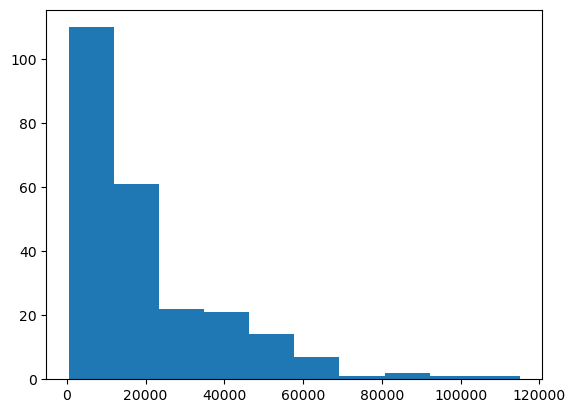

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

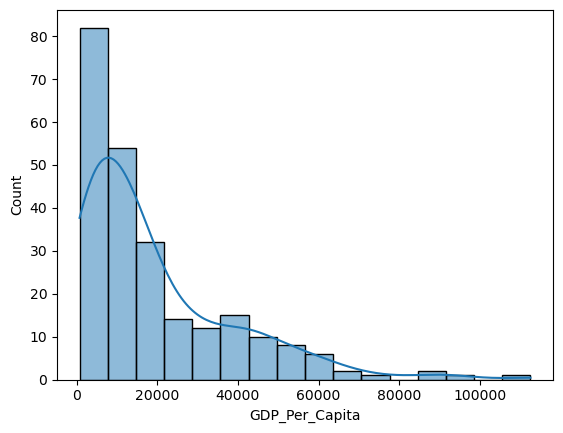

In [43]:
#8 histogram

#(link for help sns histogram: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751)
#(1st histogram based on datacamp notes / 2nd histogram using seaborn/sns....sns looks nicer)
plt.hist(gdp_2020.GDP_Per_Capita, range=(500, 115000)) 
plt.show()
sns.histplot(gdp_2020['GDP_Per_Capita'], kde=True)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

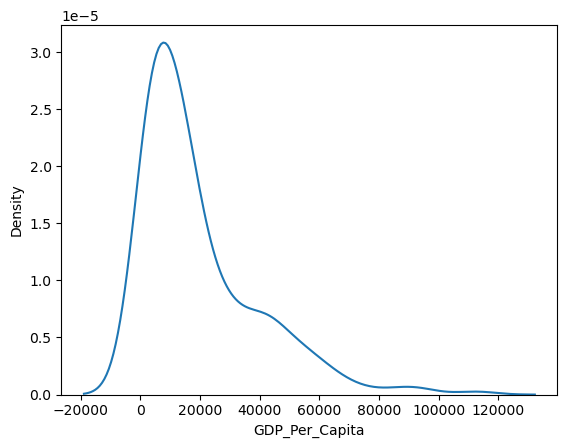

In [40]:
#8 density plot
# (link for help: https://www.python-graph-gallery.com/density-plot/)
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

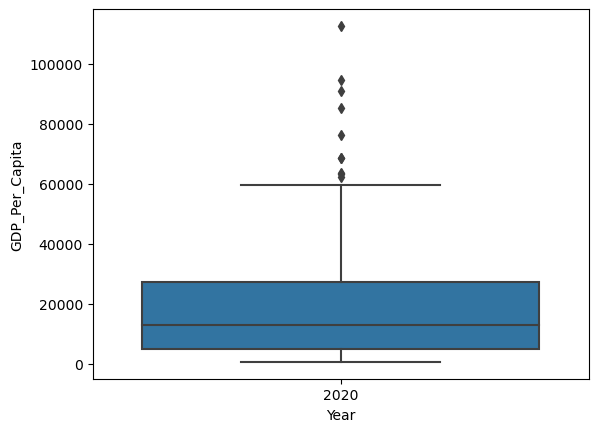

In [41]:
#8 box plot
# (link for help: https://www.python-graph-gallery.com/boxplot/ )
sns.boxplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

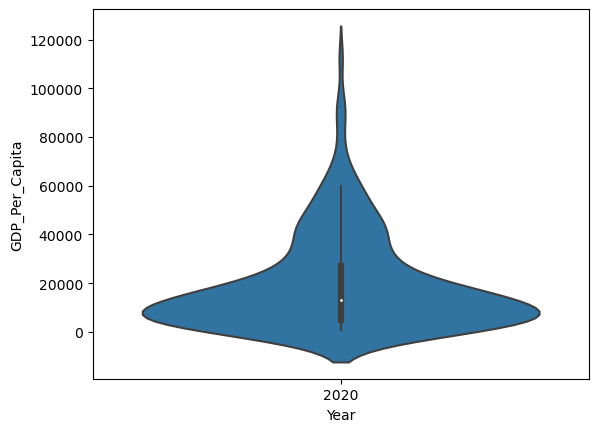

In [45]:
#8 violin plot
# (Link for help: https://www.python-graph-gallery.com/violin-plot/ )
sns.violinplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])